In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-yield-prediction-dataset/yield.csv
/kaggle/input/crop-yield-prediction-dataset/temp.csv
/kaggle/input/crop-yield-prediction-dataset/rainfall.csv
/kaggle/input/crop-yield-prediction-dataset/pesticides.csv
/kaggle/input/crop-yield-prediction-dataset/yield_df.csv


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Data Importing

In [3]:
df = pd.read_csv("/kaggle/input/crop-yield-prediction-dataset/yield_df.csv")


In [4]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)


In [6]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [8]:
df.isnull().sum()


Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [9]:
df.duplicated().sum()


2310

In [10]:
df.drop_duplicates(inplace=True)


In [11]:
df.duplicated().sum()


0

In [12]:
df.shape


(25932, 7)

In [13]:
df.describe()


,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [15]:
df.corr(numeric_only = True)


,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Year,1.000000,0.091327,-0.006423,0.135127,0.013701
hg/ha_yield,0.091327,1.000000,-0.004067,0.065523,-0.110400
average_rain_fall_mm_per_year,-0.006423,-0.004067,1.000000,0.161483,0.333694
pesticides_tonnes,0.135127,0.065523,0.161483,1.000000,0.045577
avg_temp,0.013701,-0.110400,0.333694,0.045577,1.000000


 # Data Visualization

In [16]:
len(df['Area'].unique())


101

In [17]:
len(df['Item'].unique())


10

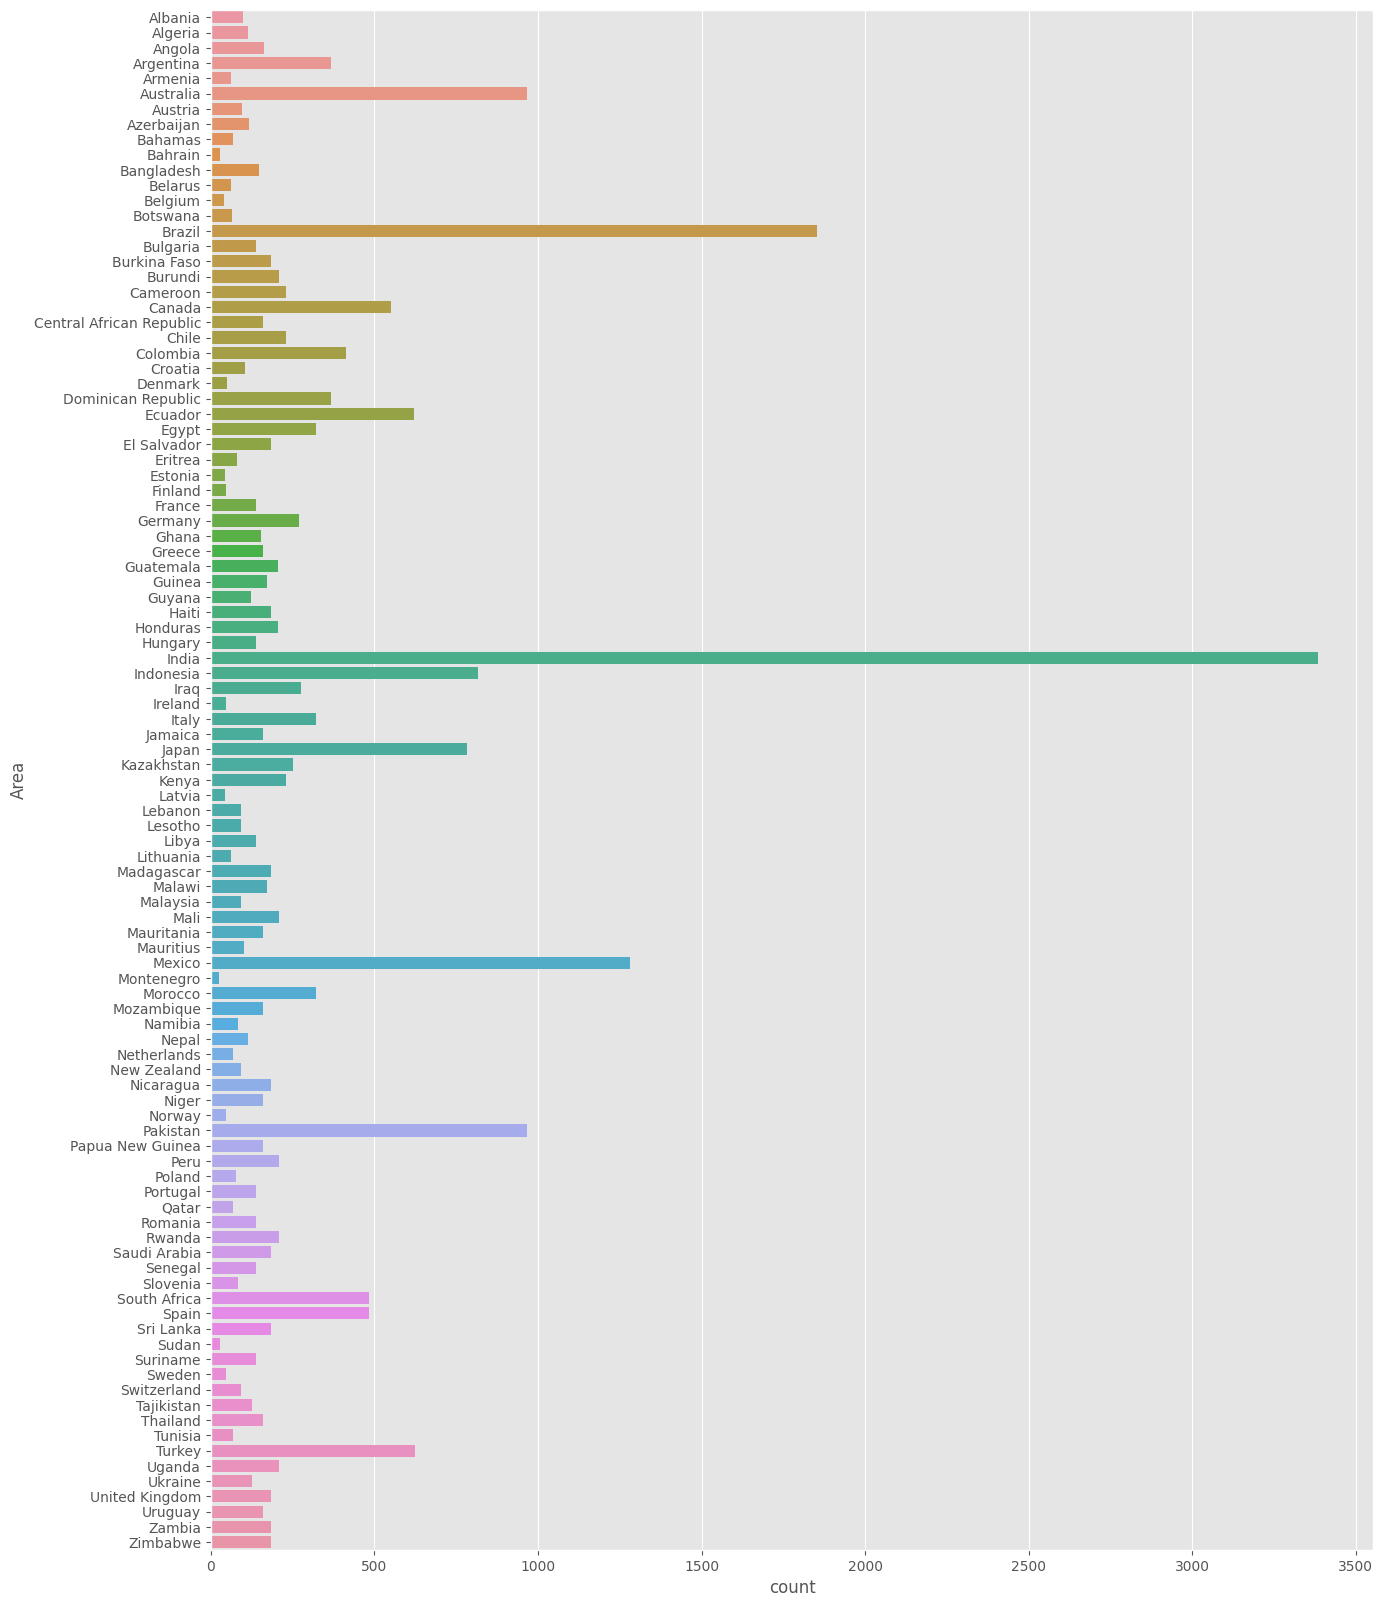

In [20]:
plt.figure(figsize=(15,20))
sns.countplot(y = df['Area'])
plt.show()

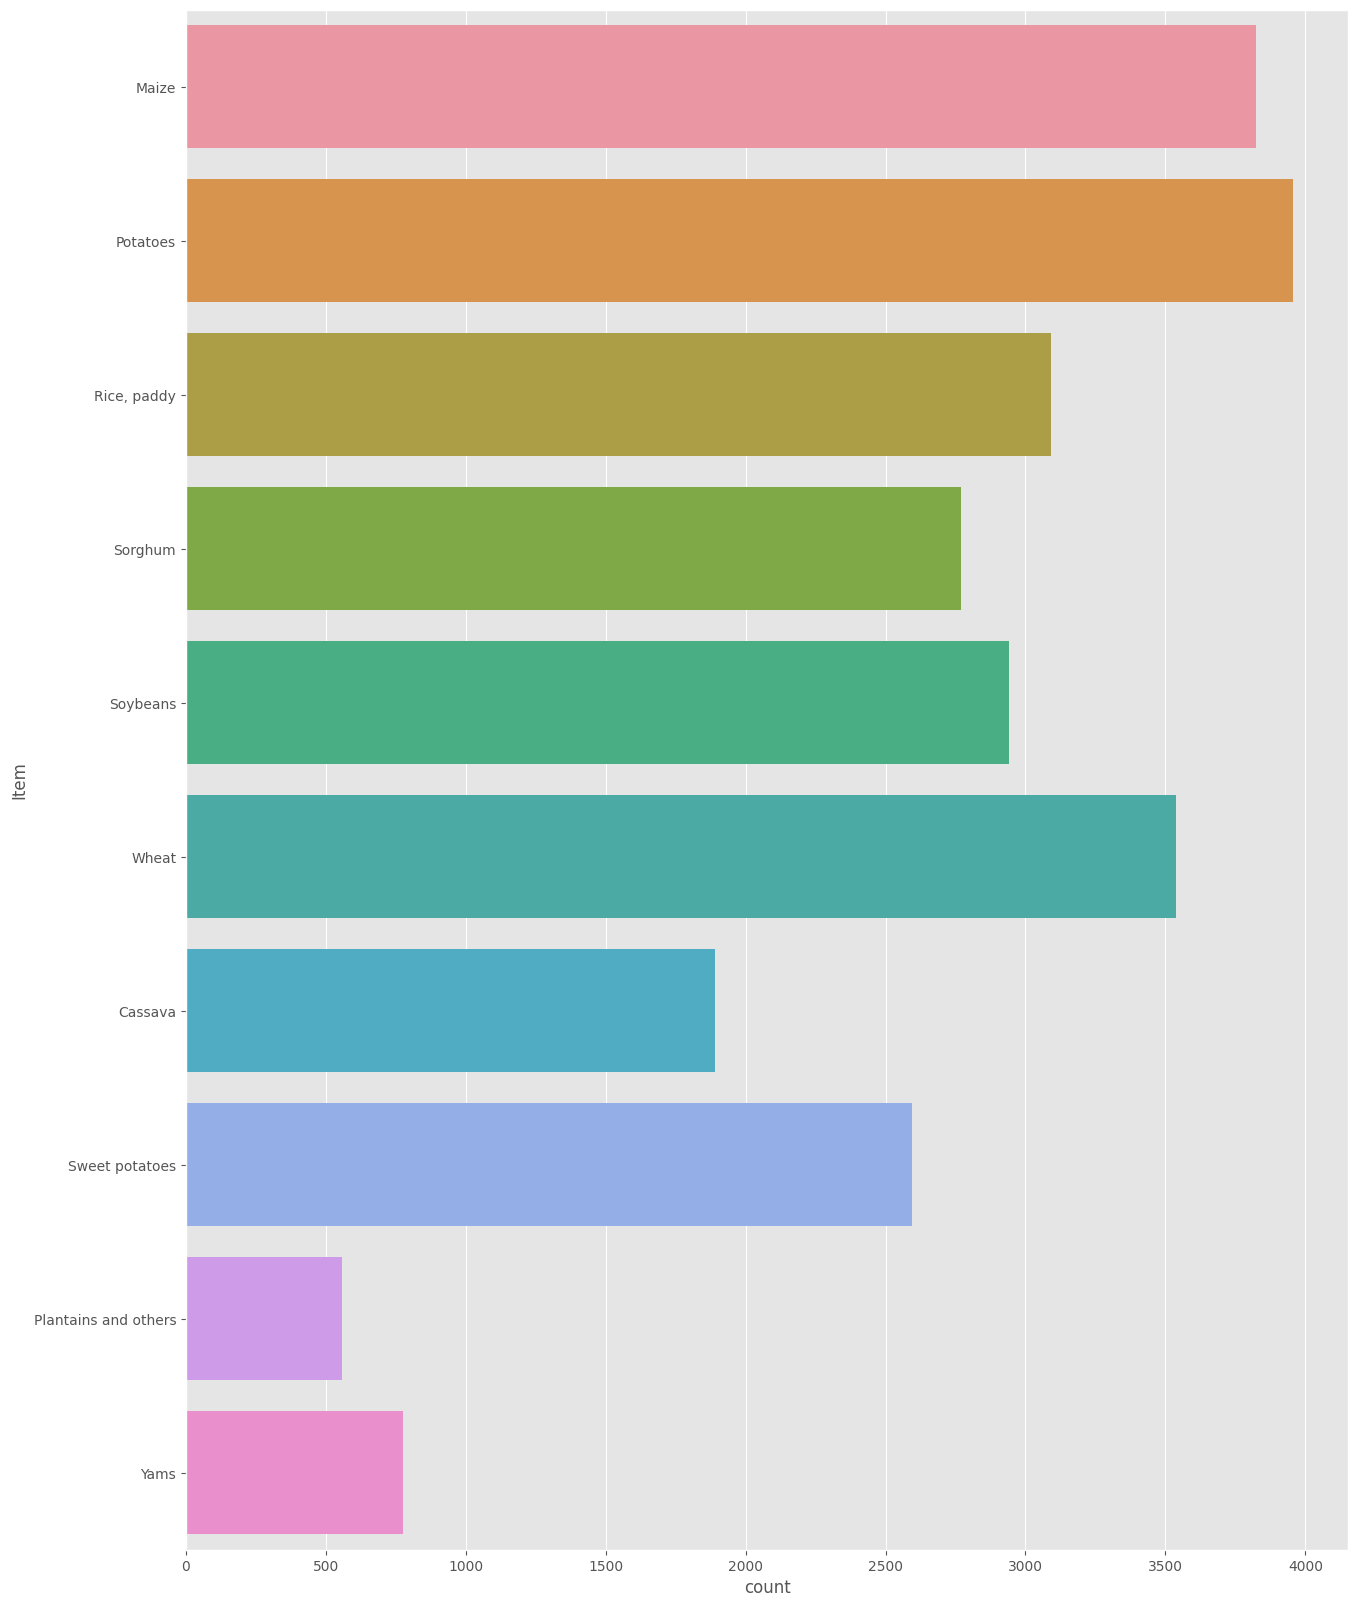

In [21]:
plt.figure(figsize=(15,20))
sns.countplot(y = df['Item'])
plt.show()

In [22]:
(df['Area'].value_counts() <400).sum()


88

In [23]:
country = df['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(df[df['Area'] == state]['hg/ha_yield'].sum())

In [24]:
df['hg/ha_yield'].sum()


1996196943

In [25]:
yield_per_country


[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

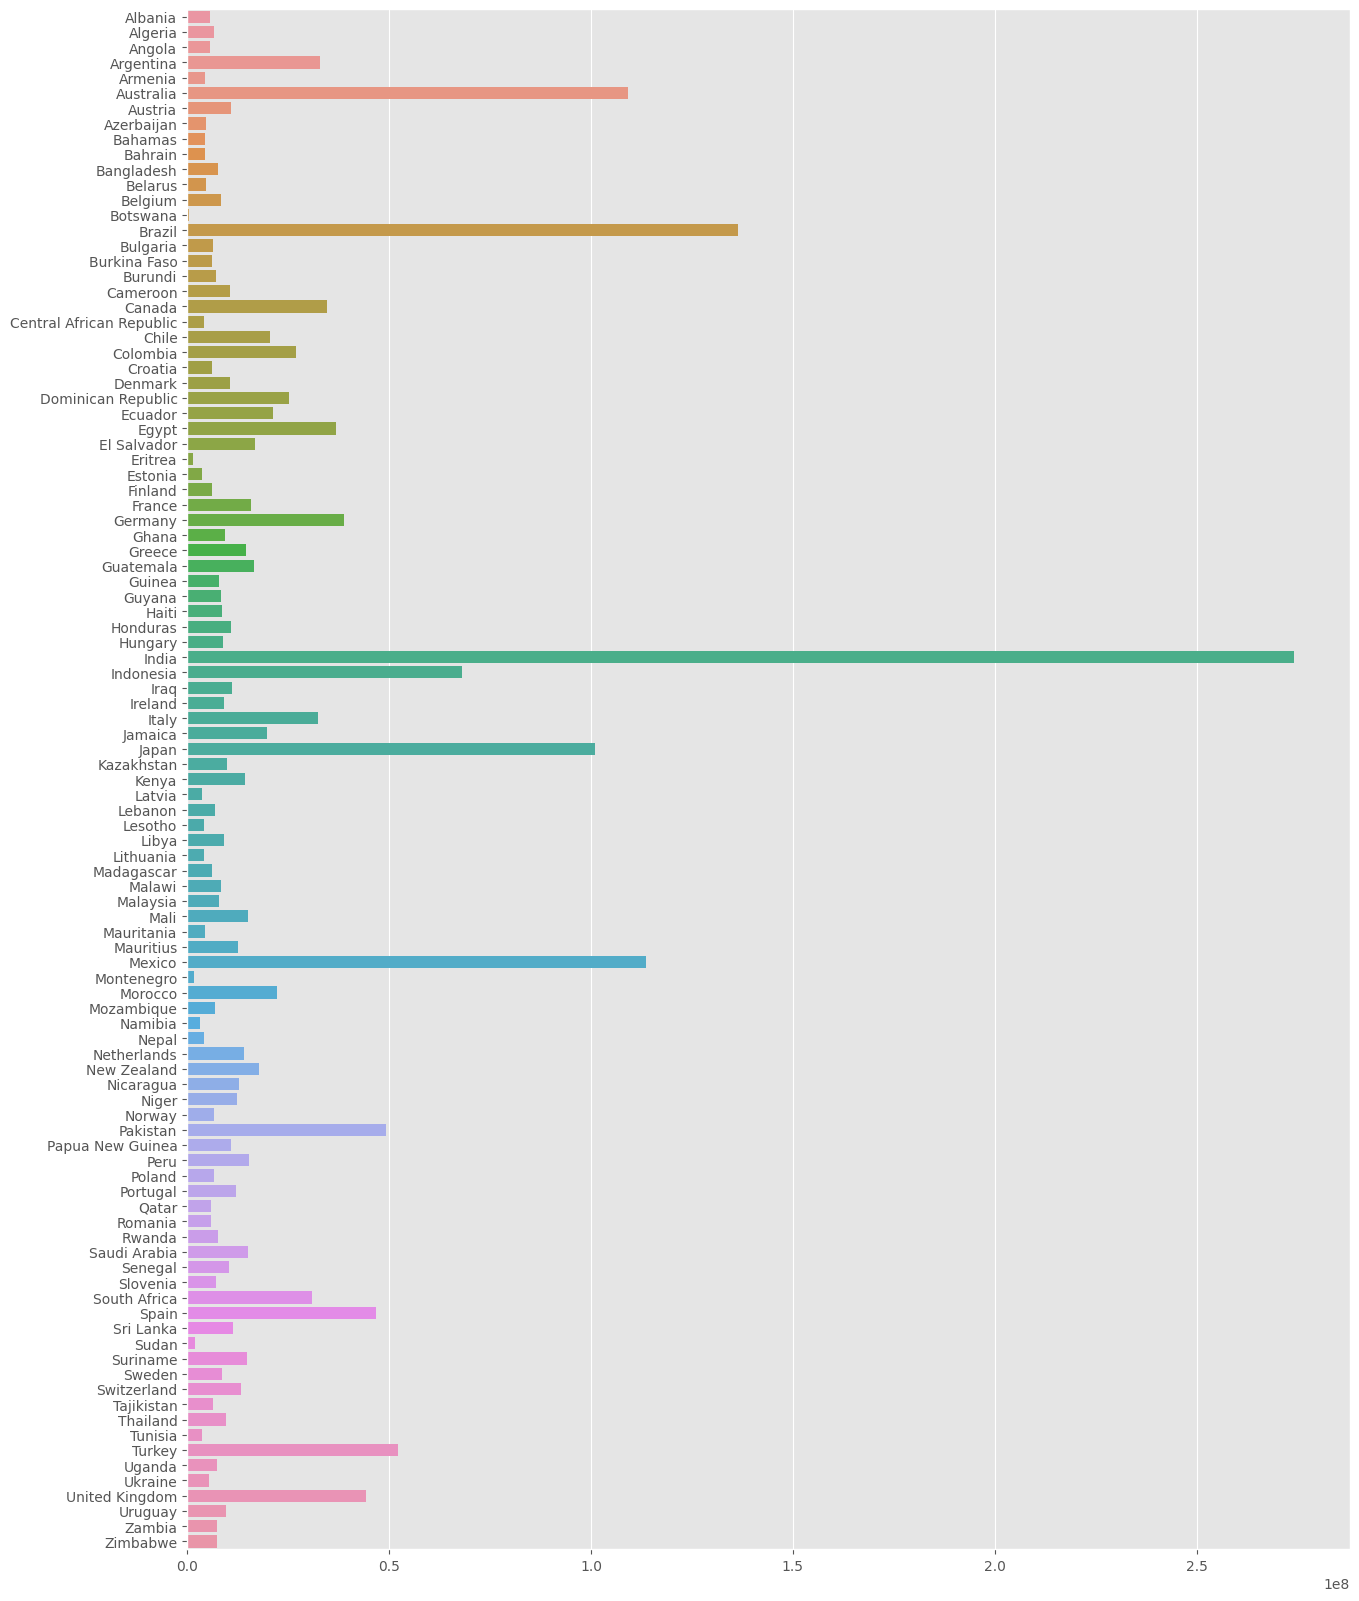

In [26]:
plt.figure(figsize=(15,20))
sns.barplot(y = country, x = yield_per_country)
plt.show()

In [27]:
df.head()


,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [28]:
df.columns


Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [29]:
col = ['Year','average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp','Area', 'Item', 'hg/ha_yield']


In [30]:
df = df[col]


In [31]:
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000


In [32]:
X = df.drop('hg/ha_yield', axis = 1)
y = df['hg/ha_yield']

In [33]:
X.shape


(25932, 6)

In [34]:
y.shape


(25932,)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, shuffle=True)

In [36]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Create OneHotEncoder and StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

# Define the ColumnTransformer
preprocesser = ColumnTransformer(
    transformers=[
        ('StandardScale', scale, [0, 1, 2, 3]),  # Standardize numerical columns
        ('OneHotEncode', ohe, [4, 5])           # One-hot encode categorical columns
    ],
    remainder='passthrough'  # Pass through the rest of the columns unchanged
)

# Apply transformations to the training data
X_train_dummy = preprocesser.fit_transform(X_train)

# Apply transformations to the test data
X_test_dummy = preprocesser.transform(X_test)

# Get the names of the output features (if using column names)
# Assuming 'col' is a list of column names
feature_names = preprocesser.get_feature_names_out()

print(feature_names)


['StandardScale__Year' 'StandardScale__average_rain_fall_mm_per_year'
 'StandardScale__pesticides_tonnes' 'StandardScale__avg_temp'
 'OneHotEncode__Area_Algeria' 'OneHotEncode__Area_Angola'
 'OneHotEncode__Area_Argentina' 'OneHotEncode__Area_Armenia'
 'OneHotEncode__Area_Australia' 'OneHotEncode__Area_Austria'
 'OneHotEncode__Area_Azerbaijan' 'OneHotEncode__Area_Bahamas'
 'OneHotEncode__Area_Bahrain' 'OneHotEncode__Area_Bangladesh'
 'OneHotEncode__Area_Belarus' 'OneHotEncode__Area_Belgium'
 'OneHotEncode__Area_Botswana' 'OneHotEncode__Area_Brazil'
 'OneHotEncode__Area_Bulgaria' 'OneHotEncode__Area_Burkina Faso'
 'OneHotEncode__Area_Burundi' 'OneHotEncode__Area_Cameroon'
 'OneHotEncode__Area_Canada' 'OneHotEncode__Area_Central African Republic'
 'OneHotEncode__Area_Chile' 'OneHotEncode__Area_Colombia'
 'OneHotEncode__Area_Croatia' 'OneHotEncode__Area_Denmark'
 'OneHotEncode__Area_Dominican Republic' 'OneHotEncode__Area_Ecuador'
 'OneHotEncode__Area_Egypt' 'OneHotEncode__Area_El Salvador

In [37]:
preprocesser.get_feature_names_out(col[:-1])


array(['StandardScale__Year',
       'StandardScale__average_rain_fall_mm_per_year',
       'StandardScale__pesticides_tonnes', 'StandardScale__avg_temp',
       'OneHotEncode__Area_Algeria', 'OneHotEncode__Area_Angola',
       'OneHotEncode__Area_Argentina', 'OneHotEncode__Area_Armenia',
       'OneHotEncode__Area_Australia', 'OneHotEncode__Area_Austria',
       'OneHotEncode__Area_Azerbaijan', 'OneHotEncode__Area_Bahamas',
       'OneHotEncode__Area_Bahrain', 'OneHotEncode__Area_Bangladesh',
       'OneHotEncode__Area_Belarus', 'OneHotEncode__Area_Belgium',
       'OneHotEncode__Area_Botswana', 'OneHotEncode__Area_Brazil',
       'OneHotEncode__Area_Bulgaria', 'OneHotEncode__Area_Burkina Faso',
       'OneHotEncode__Area_Burundi', 'OneHotEncode__Area_Cameroon',
       'OneHotEncode__Area_Canada',
       'OneHotEncode__Area_Central African Republic',
       'OneHotEncode__Area_Chile', 'OneHotEncode__Area_Colombia',
       'OneHotEncode__Area_Croatia', 'OneHotEncode__Area_Denmark',
   

In [40]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, BayesianRidge, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor  # Requires xgboost library installed
from lightgbm import LGBMRegressor  # Requires lightgbm library installed
from catboost import CatBoostRegressor  # Requires catboost library installed

# Dictionary of models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'Bayesian Ridge': BayesianRidge(),
    'SGD Regressor': SGDRegressor(),
    'KNN': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Bagging Regressor': BaggingRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'SVR': SVR(),
    'MLP Regressor': MLPRegressor(),
    'Gaussian Process': GaussianProcessRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0),  # verbose=0 to suppress output
}


In [41]:
# Loop through models, train and evaluate
for name, md in models.items():
    try:
        # Fit the model on training data
        md.fit(X_train_dummy, y_train)
        
        # Predict on test data
        y_pred = md.predict(X_test_dummy)
        
        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Accuracy for regression is typically interpreted using R2 score
        accuracy = r2  # As regression does not have direct accuracy metric
        
        # Print all metrics
        print(f"{name}:")
        print(f" - MAE: {mae:.4f}")
        print(f" - MSE: {mse:.4f}")
        print(f" - R2 score: {r2:.4f}")
        print(f" - Accuracy (R2): {accuracy:.4f}\n")
    
    except Exception as e:
        print(f"{name} failed due to {e}\n")

Linear Regression:
 - MAE: 29907.4860
 - MSE: 1817346354.9905
 - R2 score: 0.7473
 - Accuracy (R2): 0.7473



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505228
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso:
 - MAE: 29893.9976
 - MSE: 1817244976.0757
 - R2 score: 0.7473
 - Accuracy (R2): 0.7473

Ridge failed due to cg() got an unexpected keyword argument 'tol'

ElasticNet:
 - MAE: 54722.2732
 - MSE: 5465753407.3456
 - R2 score: 0.2400
 - Accuracy (R2): 0.2400

Bayesian Ridge failed due to A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

SGD Regressor:
 - MAE: 29968.4329
 - MSE: 1855887860.5568
 - R2 score: 0.7420
 - Accuracy (R2): 0.7420

KNN:
 - MAE: 4620.0373
 - MSE: 108584434.6127
 - R2 score: 0.9849
 - Accuracy (R2): 0.9849

Decision Tree:
 - MAE: 3912.9472
 - MSE: 150328780.4633
 - R2 score: 0.9791
 - Accuracy (R2): 0.9791

Random Forest:
 - MAE: 3682.6363
 - MSE: 88071852.8674
 - R2 score: 0.9878
 - Accuracy (R2): 0.9878

Gradient Boosting:
 - MAE: 25101.9556
 - MSE: 1727760964.4073
 - R2 score: 0.7598
 - Accuracy (R2): 0.7598

AdaBoost:
 - MAE: 49719.1996
 - MSE: 3640148801.5817
 - R2 score: 0.4939
 - Accuracy (R2): 0

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Regressor:
 - MAE: 49036.7427
 - MSE: 5353906508.7612
 - R2 score: 0.2556
 - Accuracy (R2): 0.2556

Gaussian Process failed due to A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

XGBoost:
 - MAE: 8822.6341
 - MSE: 236833504.1260
 - R2 score: 0.9671
 - Accuracy (R2): 0.9671

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004984 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 846
[LightGBM] [Info] Number of data points in the train set: 20745, number of used features: 112
[LightGBM] [Info] Start training from score 76670.602507
LightGBM:
 - MAE: 10868.4802
 - MSE: 327897533.9629
 - R2 score: 0.9544
 - Accuracy (R2): 0.9544

CatBoost:
 - MAE: 9748.9090
 - MSE: 249536150.6427
 - R2 score: 0.9653
 - Accuracy (R2): 0.9653



In [43]:
rf = RandomForestRegressor()
rf.fit(X_train_dummy,y_train)
rf.predict(X_test_dummy)

array([38322.33, 24148.24, 21684.41, ..., 20493.55, 34871.75, 86610.44])

In [44]:
df.columns


Index(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp', 'Area', 'Item', 'hg/ha_yield'],
      dtype='object')

In [45]:
df.head()


,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000


# Prediction

In [50]:
def prediction(Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Area, Item):
    features = np.array([[Year, average_rain_fall_mm_per_year,pesticides_tonnes, avg_temp, Area, Item]], dtype = object)
    transform_features = preprocesser.transform(features)
    predicted_yeild = rf.predict(transform_features).reshape(-1,1)
    return predicted_yeild[0][0]

In [51]:
result = prediction(1990,1485.0,121.0,16.37,'Albania','Maize')


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [52]:
result


34011.11

In [55]:
import pickle
pickle.dump(rf, open("rf.pkl","wb"))
pickle.dump(preprocesser, open("preprocesser.pkl","wb"))